<a href="https://colab.research.google.com/github/facumdito/final-pavon/blob/longo/prueba_m_a_pavon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cargar repo de github
!git clone https://github.com/facumdito/final-pavon.git
%cd final-pavon

Cloning into 'final-pavon'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 55 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 3.65 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/final-pavon


Saving Student Alcohol Consumption_TF (1).csv to Student Alcohol Consumption_TF (1) (2).csv
Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1013 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  940 non-null    float64
 13  studytime   992 non-null    float64
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nu

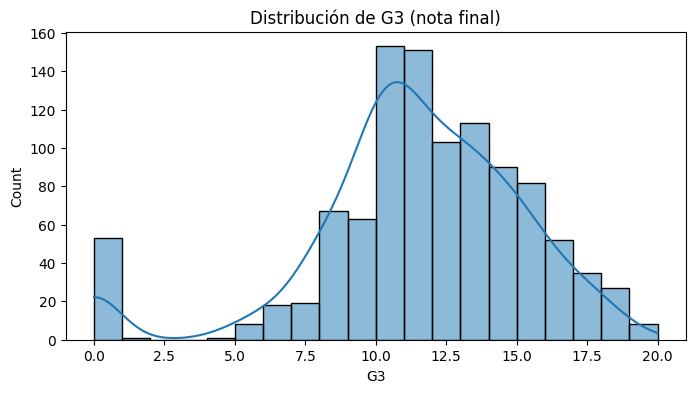

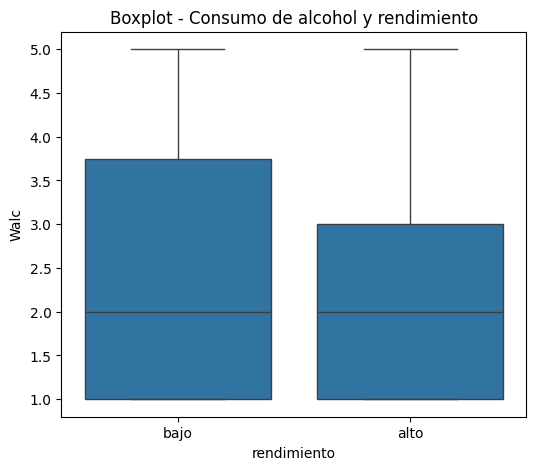

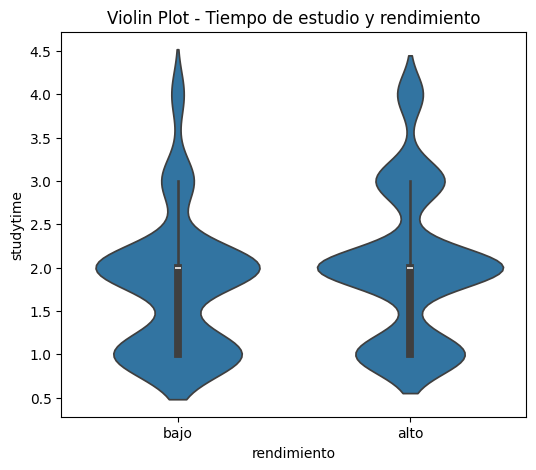

Variables seleccionadas:
Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout', 'Dalc',
       'absences', 'G1', 'G2', 'school_MS', 'reason_reputation',
       'guardian_other', 'higher_yes', 'romantic_yes'],
      dtype='object')

=== Regresión Logística ===
Accuracy:  0.89
Precision: 0.87
Recall:    0.66
F1 Score:  0.75


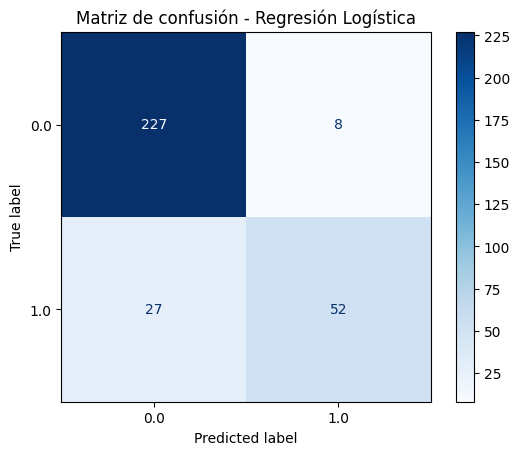


=== Random Forest ===
Accuracy:  0.89
Precision: 0.91
Recall:    0.63
F1 Score:  0.75


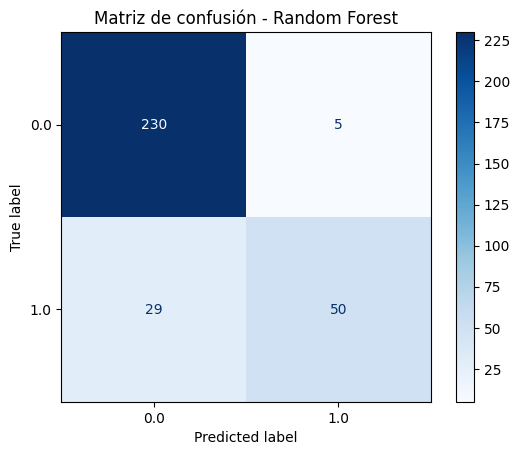

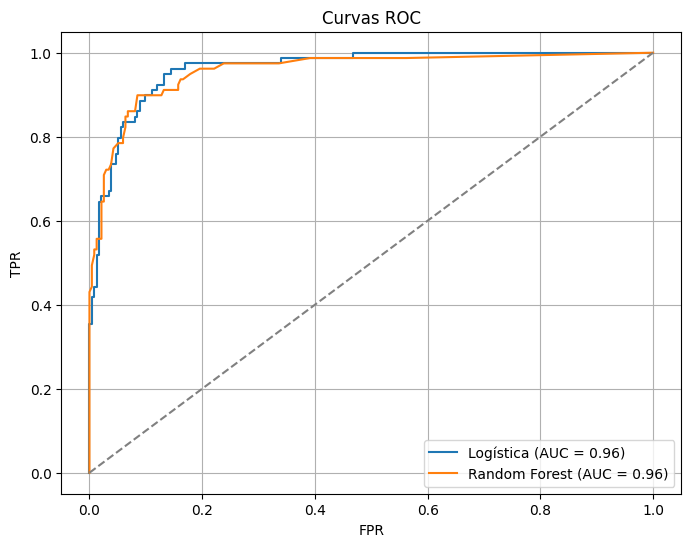

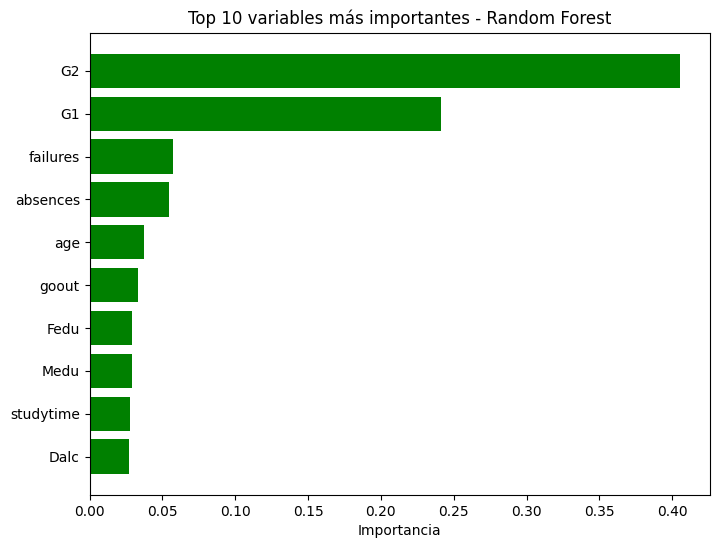

In [ ]:
# 📌 SUBIDA DE ARCHIVO MANUAL
from google.colab import files
uploaded = files.upload()

# 📄 LECTURA DEL CSV
import io
import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# ==========================
# 1. ANÁLISIS EXPLORATORIO
# ==========================

print("Primeras filas:")
display(df.head())

print("Información del dataset:")
print(df.info())

print("Valores nulos por columna:")
print(df.isnull().sum())

# 🔄 Binarización de la variable objetivo
df['rendimiento'] = df['G3'].apply(lambda x: 'alto' if x >= 10 else 'bajo')

# 📊 Gráficos iniciales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['G3'], kde=True, bins=20)
plt.title("Distribución de G3 (nota final)")
plt.show()

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x='rendimiento', y='Walc', data=df)
plt.title('Boxplot - Consumo de alcohol y rendimiento')
plt.show()

# Violin plot
plt.figure(figsize=(6,5))
sns.violinplot(x='rendimiento', y='studytime', data=df)
plt.title('Violin Plot - Tiempo de estudio y rendimiento')
plt.show()

# ===============================
# 2. PREPARACIÓN DE LOS DATOS
# ===============================

# 👉 Codificamos variables categóricas con dummies
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('rendimiento')
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 👉 Codificamos la variable target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['rendimiento'] = le.fit_transform(df['rendimiento'])  # 1=alto, 0=bajo

# 👉 Imputación de valores nulos
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_encoded[df_encoded.columns] = imputer.fit_transform(df_encoded)

# 👉 Separación en features y target
X = df_encoded.drop(['G3', 'rendimiento'], axis=1)
y = df_encoded['rendimiento']

# ===============================
# 3. SELECCIÓN DE VARIABLES
# ===============================

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

selected_cols = X.columns[selector.get_support()]

print("Variables seleccionadas:")
print(selected_cols)

# ===============================
# 4. DIVISIÓN Y ESCALADO
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# 5. ENTRENAMIENTO DE MODELOS
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1: Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ===============================
# 6. EVALUACIÓN DE MODELOS
# ===============================

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)

# 📌 Función auxiliar para métricas
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"\n=== {nombre} ===")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.2f}")
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

# Evaluación
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

# ===============================
# 7. CURVAS ROC
# ===============================

y_proba_log = log_model.predict_proba(X_test_scaled)[:,1]
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logística (AUC = {auc(fpr_log, tpr_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC")
plt.legend()
plt.grid()
plt.show()

# ===============================
# 8. IMPORTANCIA DE VARIABLES
# ===============================

import numpy as np

importancias = rf_model.feature_importances_
indices = np.argsort(importancias)[-10:]

plt.figure(figsize=(8,6))
plt.title("Top 10 variables más importantes - Random Forest")
plt.barh(range(len(indices)), importancias[indices], color="green")
plt.yticks(range(len(indices)), [X[selected_cols].columns[i] for i in indices])
plt.xlabel("Importancia")
plt.show()


Primeras filas:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1013 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  940 non-null    float64
 13  studytime   992 non-null    float64
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1013.000000,1044.000000,1044.000000,940.000000,992.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.723593,2.603448,2.387931,1.524468,1.975806,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.233831,1.124907,1.099938,0.734396,0.836491,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


estudiantes totales: 1044
0        5.666667
1        5.333333
2        8.333333
3       14.666667
4        8.666667
          ...    
1039    10.333333
1040    15.333333
1041    10.666667
1042    10.000000
1043    10.666667
Name: FG, Length: 1044, dtype: float64


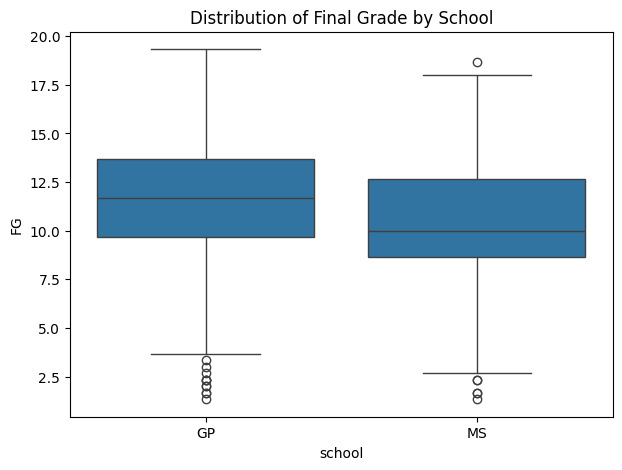

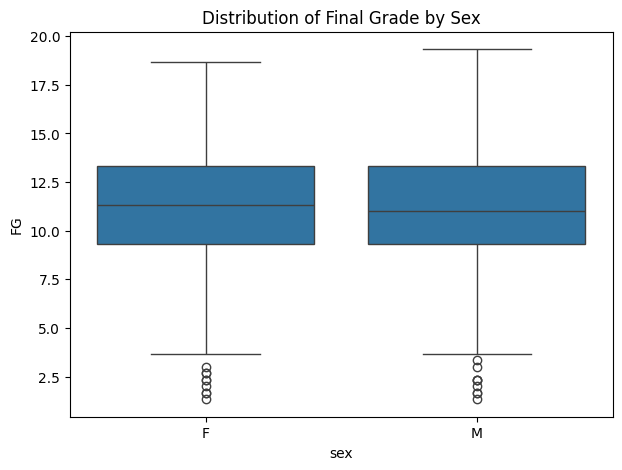

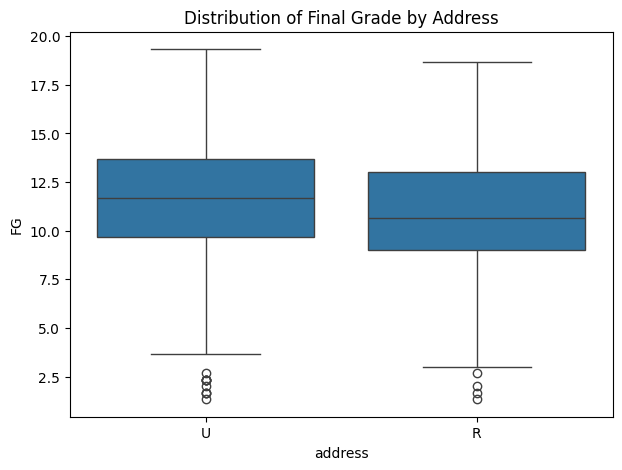

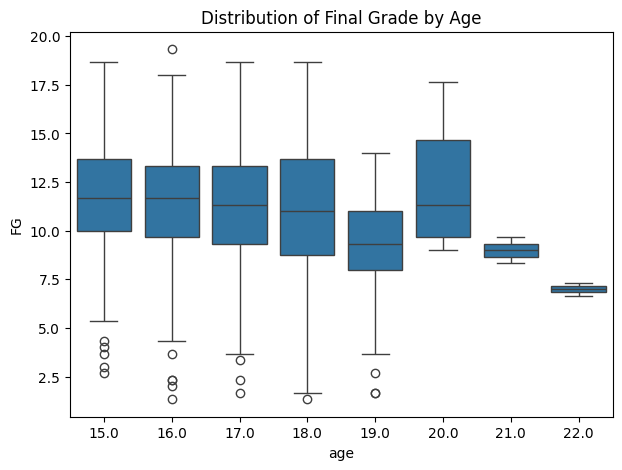

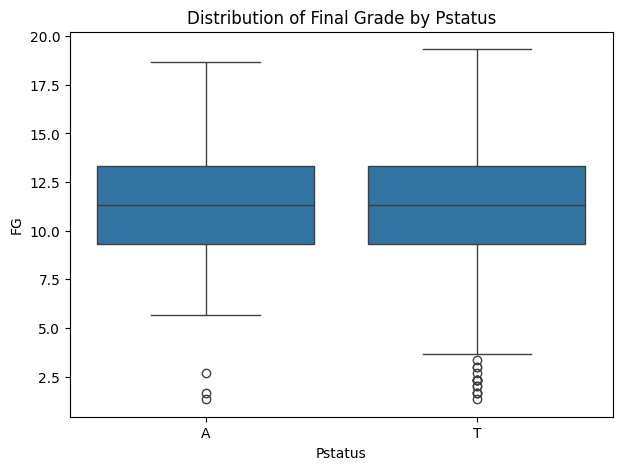

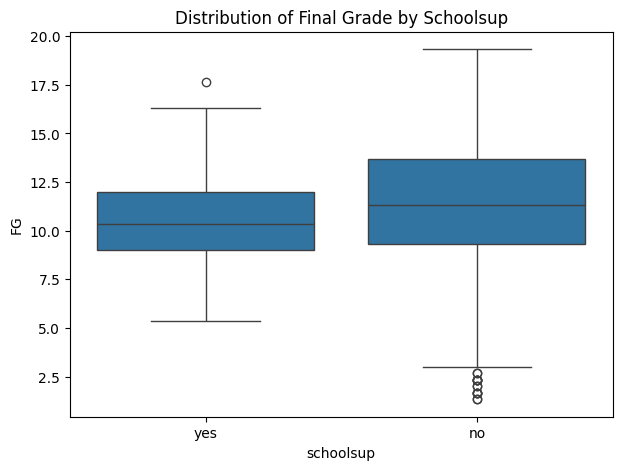

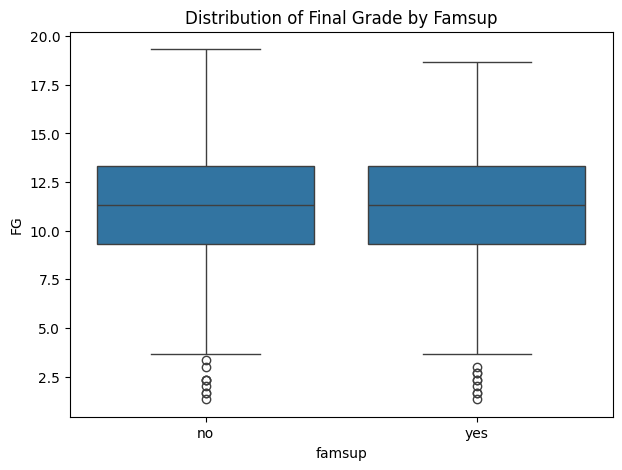

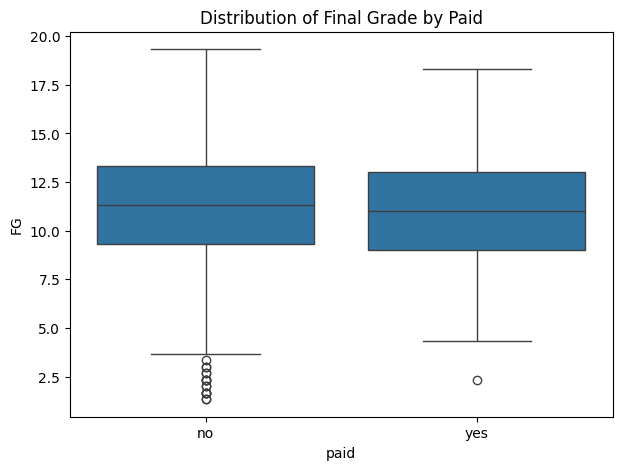

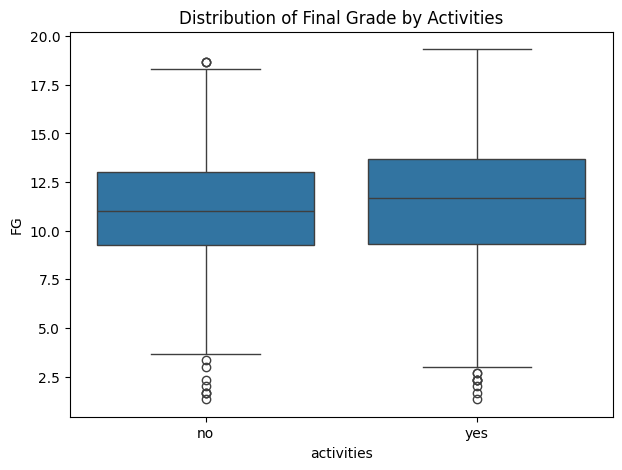

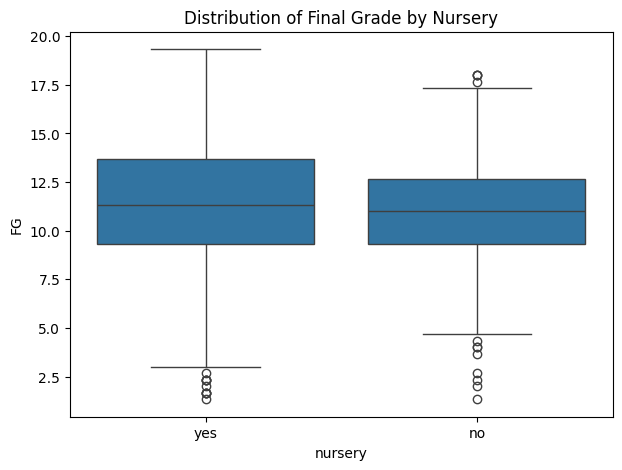

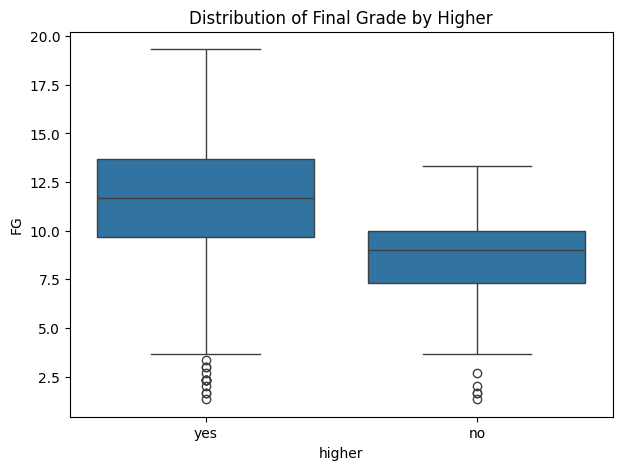

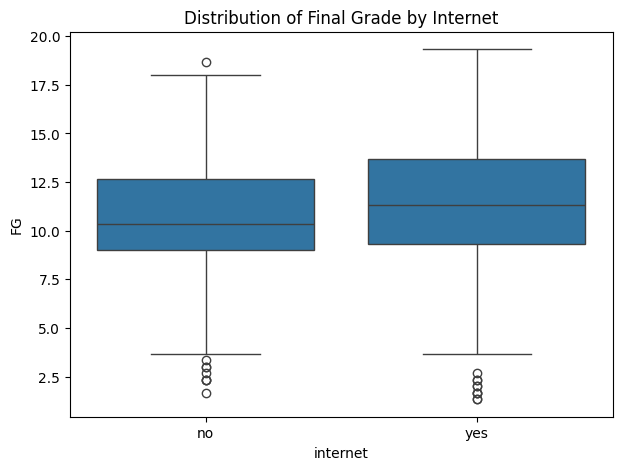

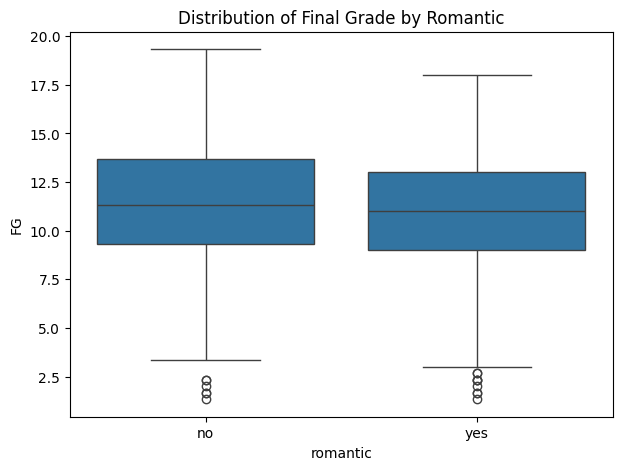

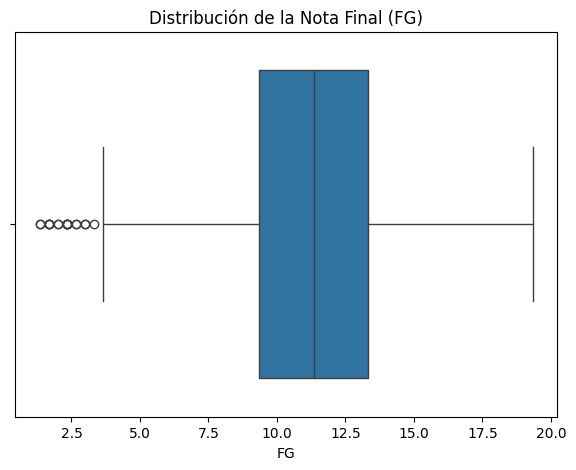

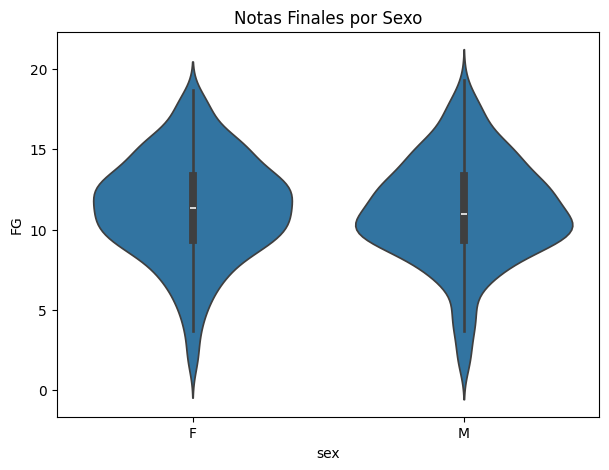

Nulos por columna:
school          0
sex             0
age            31
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime    104
studytime      52
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
FG              0
dtype: int64


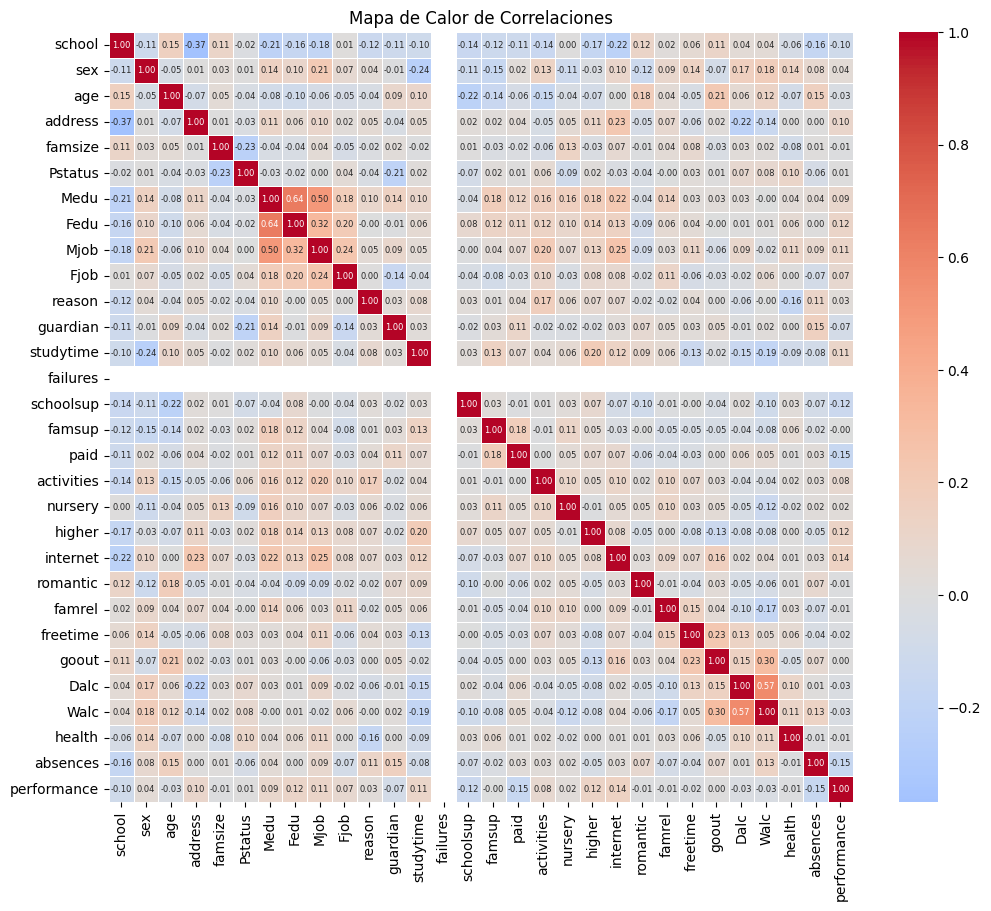



📊 Resultados para Regresión Logística
Accuracy: 0.839622641509434
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.84      1.00      0.91        87

    accuracy                           0.84       106
   macro avg       0.92      0.55      0.55       106
weighted avg       0.87      0.84      0.78       106



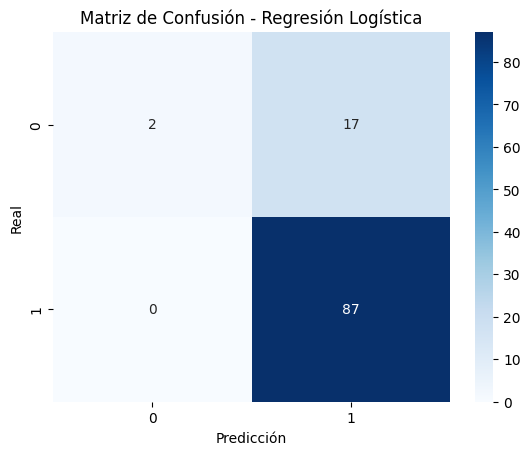



📊 Resultados para Random Forest
Accuracy: 0.7735849056603774
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.81      0.94      0.87        87

    accuracy                           0.77       106
   macro avg       0.41      0.47      0.44       106
weighted avg       0.67      0.77      0.72       106



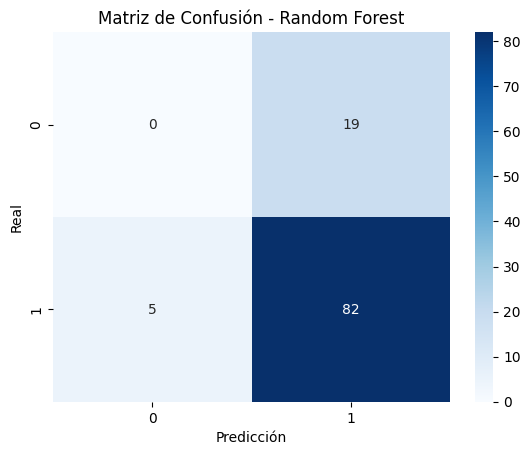



📊 Resultados para Decision Tree
Accuracy: 0.7547169811320755
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.23      0.16      0.19        19
           1       0.83      0.89      0.86        87

    accuracy                           0.75       106
   macro avg       0.53      0.52      0.52       106
weighted avg       0.72      0.75      0.74       106



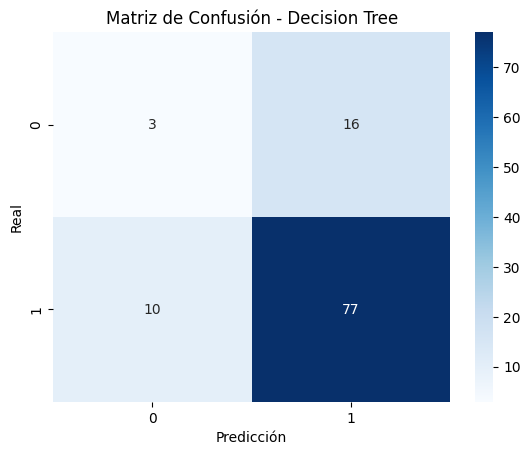



📌 Validación Cruzada (5-fold)
Regresión Logística: Scores=[0.81132075 0.83018868 0.82857143 0.83809524 0.81904762], Media=0.825, Desv. estándar=0.009
Random Forest: Scores=[0.81132075 0.78301887 0.67619048 0.8        0.8       ], Media=0.774, Desv. estándar=0.050
Decision Tree: Scores=[0.80188679 0.80188679 0.73333333 0.81904762 0.79047619], Media=0.789, Desv. estándar=0.029


In [ ]:
# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

# Cargar los datos desde el archivo CSV
student_data = pd.read_csv('Student Alcohol Consumption_TF.csv')

# Vista general
print("Primeras filas:")
display(student_data.head())
print("\nInfo:")
student_data.info()
print("\nDescripción:")
display(student_data.describe())
print(f"estudiantes totales: {len(student_data)}")

# Crear promedio FG
student_data["FG"] = student_data[["G1", "G2", "G3"]].mean(axis=1)
print(student_data["FG"])

# =============================
# 2. VISUALIZACIÓN INICIAL
# =============================
binary_vars = ['school', 'sex', 'address', 'age', 'Pstatus', 'schoolsup', 'famsup', 'paid',
               'activities', 'nursery', 'higher', 'internet', 'romantic']

if not os.path.exists('plots'):
    os.makedirs('plots')

for var in binary_vars:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=var, y='FG', data=student_data)
    plt.title(f'Distribution of Final Grade by {var.capitalize()}')
    plt.savefig(os.path.join('plots', f'FG_by_{var}.png'))
    plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x='FG', data=student_data)
plt.title('Distribución de la Nota Final (FG)')
plt.show()

plt.figure(figsize=(7,5))
sns.violinplot(x='sex', y='FG', data=student_data)
plt.title('Notas Finales por Sexo')
plt.show()

# =============================
# 3. LIMPIEZA Y BINARIZACIÓN
# =============================
print("Nulos por columna:")
print(student_data.isnull().sum())

# Filtrar outliers numéricos
numeric_cols = student_data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = student_data[col].quantile(0.25)
    Q3 = student_data[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (student_data[col] >= Q1 - 1.5 * IQR) & (student_data[col] <= Q3 + 1.5 * IQR)
    student_data = student_data[mask]

if 'traveltime' in student_data.columns:
    student_data.drop(columns='traveltime', inplace=True)

# Aquí asumimos que no hay nulos en binarias para simplificar (puedes añadir imputación si hace falta)

# Binarizar rendimiento: FG >= 10 es alto (1), si no es bajo (0)
student_data['performance'] = student_data['FG'].apply(lambda x: 1 if x >= 10 else 0)

# Eliminar columnas redundantes
student_data.drop(columns=['G1', 'G2', 'G3', 'FG'], inplace=True)

# Codificar variables categóricas
categorical_cols = student_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    student_data[col] = le.fit_transform(student_data[col])

# =============================
# 4. ANÁLISIS DE CORRELACIÓN
# =============================
corr = student_data.corr()
plt.figure(figsize=(12,10))
plt.title("Mapa de Calor de Correlaciones")
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5,
            annot=True, fmt='.2f', annot_kws={"size":6})
plt.show()

# =============================
# 5. DIVISIÓN DE DATOS Y ESCALADO (corregido)
# =============================
X = student_data.drop('performance', axis=1)
y = student_data['performance']

# Dividir primero para evitar data leakage, con stratify para balancear clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado robusto aplicado **después** de la división
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# 6. ENTRENAMIENTO DE MODELOS CON CONTROL DE COMPLEJIDAD
# =============================

# Modelo 1: Regresión Logística con regularización
log_model = LogisticRegression(C=0.1, max_iter=1000)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

# Modelo 2: Random Forest con profundidad limitada y balanceo
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,
                                  class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Modelo 3: Decision Tree con restricciones para evitar overfitting
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=20,
                                  min_samples_leaf=10, random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

# =============================
# 7. EVALUACIÓN DE MODELOS
# =============================
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n\n📊 Resultados para {nombre}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

evaluar_modelo("Regresión Logística", y_test, log_pred)
evaluar_modelo("Random Forest", y_test, rf_pred)
evaluar_modelo("Decision Tree", y_test, dt_pred)

# =============================
# 8. VALIDACIÓN CRUZADA (Opcional)
# =============================
from sklearn.model_selection import cross_val_score

print("\n\n📌 Validación Cruzada (5-fold)")

for model, name in zip([log_model, rf_model, dt_model],
                       ["Regresión Logística", "Random Forest", "Decision Tree"]):
    scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy')
    print(f"{name}: Scores={scores}, Media={scores.mean():.3f}, Desv. estándar={scores.std():.3f}")
